In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 21 09:43:06 2017

@author: Arun
"""
import os
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Using TensorFlow backend.


In [13]:
#IMPORT DATA 
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_ar = train_data.iloc[:,1:2].values

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_ar = test_data.iloc[:,1:2].values



scal = MinMaxScaler()

train_ar= scal.fit_transform(train_ar)

test_ar = scal.transform(test_ar)


xtrain= train_ar[0:1257]
ytrain= train_ar[1:1258]



In [14]:

"""
Create time step - time step is the Differece between the times

Model 1: 
The time step in this case is 1

Hint
The reshape is to change the format to a 3 dimensional array to fit our Keras regressor
#The three dimensional array contains the observations , the time step and the dimension of
features respectively as the 3 diemnsional input format for keras. Refer Keras for more info
"""

xtrain = np.reshape(xtrain,(len(xtrain),1,1))
xtest = np.reshape(test_ar,(len(test_ar),1,1))

#Create Model

regressor= Sequential()
regressor.add(LSTM(units=4, activation ='sigmoid',input_shape= (None,1)))
regressor.add(Dense(units=1))
regressor.compile(optimizer ='rmsprop', loss= 'mean_squared_error')
regressor.fit(xtrain,ytrain,batch_size= 32, epochs=200)

#predictions
predicted_vals = regressor.predict(xtest)
predicted_vals = scal.inverse_transform(predicted_vals)


actual_price = test_data.iloc[:,1:2].values



Epoch 1/200
1257/1257 [==============================] - 1s - loss: 0.2496     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.1808     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.1324     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1003     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.0824     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0758     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0741     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0726     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0712     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0697     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0681     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0664     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.5013e-04     
Epoch 100/200
1257/1257 [==============================] - 0s - loss: 2.5109e-04     
Epoch 101/200
1257/1257 [==============================] - 0s - loss: 2.4991e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5025e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.5068e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.4722e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5300e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.4816e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.4975e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.5085e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.5079e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.5187e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.5022e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.4702e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.4694e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.5096e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.5254e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4939e-04     


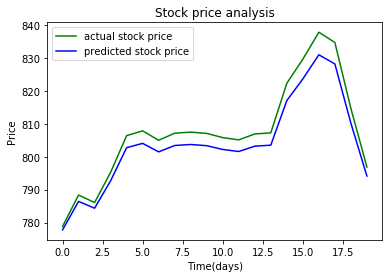

In [15]:


plt.plot(actual_price, color= 'green', label= 'actual stock price')
plt.plot(predicted_vals, color= 'blue', label= 'predicted stock price')
plt.title('Stock price analysis')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:

#Evaluate RNN

rmse = math.sqrt(mean_squared_error(actual_price,predicted_vals))

print ("The root mean squared value of our model= {}".format(rmse) )



The root mean squared value of our model= 4.064870316777899


In [20]:
"""
Make four models:
Model 1 - 20 timesteps & 1 LSTM layer
Model 2 - 20 timesteps & 4 LSTM layers
Model 3 - 60 timesteps & 1 LSTM layer
Model 4 - 60 timesteps & 4 STM layers
"""

#Model 2 - 20 timesteps & 1 LSTM layer



xtrain=[] #array with t-20
ytrain=[] #array with t


for index in range(20,len(train_ar)):
    xtrain.append(train_ar[index-20:index,0])
    ytrain.append(train_ar[index,0])
    

xtrain= np.array(xtrain)
ytrain = np.array(ytrain)
    

xtrain = np.reshape(xtrain,(len(xtrain),xtrain.shape[1],1))

#Regressor
regressor= Sequential()
regressor.add(LSTM(units=4, activation ='sigmoid',input_shape= (None,1)))
regressor.add(Dense(units=1))
regressor.compile(optimizer ='rmsprop', loss= 'mean_squared_error')
regressor.fit(xtrain,ytrain,batch_size= 32, epochs=200)


test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_ar = test_data.iloc[:,1:2].values
test_ar = scal.transform(test_ar)

combined_data = np.concatenate((train_ar,test_ar),axis=0)

test_inputs = []


for i in range(1238, 1258):
    test_inputs.append(combined_data[i:i+20, 0])


test_inputs = np.reshape(test_inputs,(len(test_inputs),xtrain.shape[1],1))
#predictions
predicted_vals = regressor.predict(test_inputs)

predicted_vals = scal.inverse_transform(predicted_vals)
test_ar = scal.inverse_transform(test_ar)



Epoch 1/200
1238/1238 [==============================] - 1s - loss: 0.0932     
Epoch 2/200
1238/1238 [==============================] - 0s - loss: 0.0782     
Epoch 3/200
1238/1238 [==============================] - 0s - loss: 0.0752     
Epoch 4/200
1238/1238 [==============================] - 0s - loss: 0.0723     
Epoch 5/200
1238/1238 [==============================] - 0s - loss: 0.0693     
Epoch 6/200
1238/1238 [==============================] - 0s - loss: 0.0660     
Epoch 7/200
1238/1238 [==============================] - 0s - loss: 0.0625     
Epoch 8/200
1238/1238 [==============================] - 0s - loss: 0.0588     
Epoch 9/200
1238/1238 [==============================] - 0s - loss: 0.0547     
Epoch 10/200
1238/1238 [==============================] - 0s - loss: 0.0499     
Epoch 11/200
1238/1238 [==============================] - 0s - loss: 0.0449     
Epoch 12/200
1238/1238 [==============================] - 0s - loss: 0.0393     
Epoch 13/200
1238/1238 [=============

1238/1238 [==============================] - 0s - loss: 4.3801e-04     
Epoch 99/200
1238/1238 [==============================] - 0s - loss: 4.4802e-04     
Epoch 100/200
1238/1238 [==============================] - 0s - loss: 4.3475e-04     
Epoch 101/200
1238/1238 [==============================] - 0s - loss: 4.4260e-04     
Epoch 102/200
1238/1238 [==============================] - 0s - loss: 4.3739e-04     
Epoch 103/200
1238/1238 [==============================] - 0s - loss: 4.4100e-04     
Epoch 104/200
1238/1238 [==============================] - 0s - loss: 4.3975e-04     
Epoch 105/200
1238/1238 [==============================] - 0s - loss: 4.3495e-04     
Epoch 106/200
1238/1238 [==============================] - 0s - loss: 4.3268e-04     
Epoch 107/200
1238/1238 [==============================] - 0s - loss: 4.3311e-04     
Epoch 108/200
1238/1238 [==============================] - 0s - loss: 4.3518e-04     
Epoch 109/200
1238/1238 [==============================] - 0s - loss:

1238/1238 [==============================] - 0s - loss: 3.6476e-04     
Epoch 193/200
1238/1238 [==============================] - 0s - loss: 3.5575e-04     
Epoch 194/200
1238/1238 [==============================] - 0s - loss: 3.5749e-04     
Epoch 195/200
1238/1238 [==============================] - 0s - loss: 3.6344e-04     
Epoch 196/200
1238/1238 [==============================] - 0s - loss: 3.4968e-04     
Epoch 197/200
1238/1238 [==============================] - 0s - loss: 3.5501e-04     
Epoch 198/200
1238/1238 [==============================] - 0s - loss: 3.6248e-04     
Epoch 199/200
1238/1238 [==============================] - 0s - loss: 3.5662e-04     
Epoch 200/200
1238/1238 [==============================] - 0s - loss: 3.4559e-04     


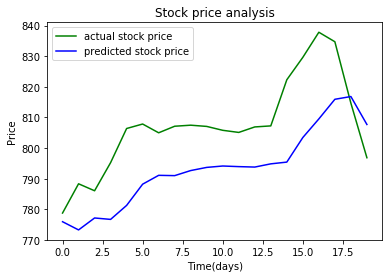

In [21]:

plt.plot(test_ar, color= 'green', label= 'actual stock price')
plt.plot(predicted_vals, color= 'blue', label= 'predicted stock price')
plt.title('Stock price analysis')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()



In [22]:

#Model 2 - 20 timesteps & 4 LSTM layers


xtrain=[] #array with t-20
ytrain=[] #array with t


for index in range(20,len(train_ar)):
    xtrain.append(train_ar[index-20:index,0])
    ytrain.append(train_ar[index,0])
    

xtrain= np.array(xtrain)
ytrain = np.array(ytrain)
    

xtrain = np.reshape(xtrain,(len(xtrain),xtrain.shape[1],1))

#Regressor
regressor= Sequential()
regressor.add(LSTM(units=4, return_sequences='True',input_shape= (None,1)))
regressor.add(LSTM(units=4, return_sequences='True'))
regressor.add(LSTM(units=4, return_sequences='True'))
regressor.add(LSTM(units=4))
regressor.add(Dense(units=1))
regressor.compile(optimizer ='rmsprop', loss= 'mean_squared_error')
regressor.fit(xtrain,ytrain,batch_size= 32, epochs=200)


test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_ar = test_data.iloc[:,1:2].values
test_ar = scal.transform(test_ar)

combined_data = np.concatenate((train_ar,test_ar),axis=0)

test_inputs = []


for i in range(1238, 1258):
    test_inputs.append(combined_data[i:i+20, 0])


test_inputs = np.reshape(test_inputs,(len(test_inputs),xtrain.shape[1],1))
#predictions
predicted_vals = regressor.predict(test_inputs)

predicted_vals = scal.inverse_transform(predicted_vals)
test_ar = scal.inverse_transform(test_ar)


Epoch 1/200
1238/1238 [==============================] - 5s - loss: 0.2141     
Epoch 2/200
1238/1238 [==============================] - 2s - loss: 0.0618     
Epoch 3/200
1238/1238 [==============================] - 1s - loss: 0.0209     
Epoch 4/200
1238/1238 [==============================] - 2s - loss: 0.0038     
Epoch 5/200
1238/1238 [==============================] - 2s - loss: 0.0028     
Epoch 6/200
1238/1238 [==============================] - 2s - loss: 0.0026     
Epoch 7/200
1238/1238 [==============================] - 2s - loss: 0.0025     
Epoch 8/200
1238/1238 [==============================] - 2s - loss: 0.0024     
Epoch 9/200
1238/1238 [==============================] - 1s - loss: 0.0025     
Epoch 10/200
1238/1238 [==============================] - 1s - loss: 0.0024     
Epoch 11/200
1238/1238 [==============================] - 1s - loss: 0.0023     
Epoch 12/200
1238/1238 [==============================] - 1s - loss: 0.0022     
Epoch 13/200
1238/1238 [=============

1238/1238 [==============================] - 1s - loss: 0.0011     
Epoch 101/200
1238/1238 [==============================] - 1s - loss: 0.0011     
Epoch 102/200
1238/1238 [==============================] - 1s - loss: 0.0010         
Epoch 103/200
1238/1238 [==============================] - 1s - loss: 0.0011     
Epoch 104/200
1238/1238 [==============================] - 1s - loss: 0.0010     
Epoch 105/200
1238/1238 [==============================] - 1s - loss: 9.9264e-04     
Epoch 106/200
1238/1238 [==============================] - 1s - loss: 0.0010         
Epoch 107/200
1238/1238 [==============================] - 1s - loss: 0.0010       
Epoch 108/200
1238/1238 [==============================] - 1s - loss: 9.7608e-04     
Epoch 109/200
1238/1238 [==============================] - 1s - loss: 0.0010     
Epoch 110/200
1238/1238 [==============================] - 1s - loss: 9.8624e-04 
Epoch 111/200
1238/1238 [==============================] - 1s - loss: 0.0010     
Epoch 112/20

1238/1238 [==============================] - 1s - loss: 6.4095e-04     
Epoch 196/200
1238/1238 [==============================] - 1s - loss: 6.4394e-04     
Epoch 197/200
1238/1238 [==============================] - 1s - loss: 6.6418e-04     
Epoch 198/200
1238/1238 [==============================] - 1s - loss: 6.3127e-04     
Epoch 199/200
1238/1238 [==============================] - 1s - loss: 6.0345e-04     
Epoch 200/200
1238/1238 [==============================] - 1s - loss: 6.0935e-04     


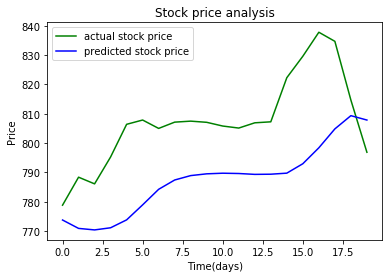

In [23]:

plt.plot(test_ar, color= 'green', label= 'actual stock price')
plt.plot(predicted_vals, color= 'blue', label= 'predicted stock price')
plt.title('Stock price analysis')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()


In [24]:

#Evaluate RNN

rmse = math.sqrt(mean_squared_error(actual_price,predicted_vals))

print ("The root mean squared value of our model= {}".format(rmse) )



The root mean squared value of our model= 23.09331757739092
